<a href="https://colab.research.google.com/github/srigouri/Data-Science-Dissertation/blob/main/BreastCancer_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [607]:
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split,cross_val_score,KFold 
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.feature_selection import RFE
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier,VotingClassifier
from sklearn.metrics import f1_score,confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import make_scorer,accuracy_score
import seaborn as sns 


In [608]:
cancer_data = pd.read_csv("https://raw.githubusercontent.com/srigouri/Data-Science-Dissertation/main/data%20(1).csv")
cancer_data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [609]:
cancer_data.drop('id',axis=1,inplace=True)
cancer_data.drop('Unnamed: 32',axis=1,inplace=True)

In [610]:
cancer_data['diagnosis'] = cancer_data['diagnosis'].map({'M':1,'B':0})


In [611]:
diagnosis=cancer_data.diagnosis;

In [612]:
X = cancer_data.drop('diagnosis' ,axis = 1 )
Y = pd.DataFrame(cancer_data.diagnosis).values.ravel()

In [613]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42 , stratify = Y)


In [614]:
Y_train.mean()


0.37362637362637363

In [615]:
Y_test.mean()

0.3684210526315789

# Bootstrapping function:

In [616]:
def bootstrap(data, size = 500):
    stat_list= []
    for i in range(size):
        new_sample = np.random.choice ( data, size= len(data) , replace= True)
        new_sample_mean = np.mean(new_sample)
        stat_list.append(new_sample_mean)
    return stat_list

In [617]:
samples = list(range(1,11))
samples

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

#split data into 85% being used for training the model, and 15% for testing:

In [618]:
SC = StandardScaler()
train_scaled_X = SC.fit_transform(X_train)
test_scaled_X = SC.transform(X_test)

In [619]:
train_scaled_X

array([[ 0.51855873,  0.89182579,  0.4246317 , ..., -0.23574392,
         0.05456632,  0.02183673],
       [-0.51636409, -1.63971029, -0.54134872, ..., -0.32320788,
        -0.13757624, -0.90440164],
       [-0.36811839,  0.45551496, -0.38824993, ..., -0.89082504,
        -0.675893  , -0.14401559],
       ...,
       [-0.32616206,  1.33280304, -0.38905998, ..., -0.84289958,
        -0.96490082, -1.16888375],
       [ 0.00948859,  0.25952507,  0.00786279, ...,  0.27571059,
        -0.60284707, -0.30545988],
       [ 0.80945595,  0.36918608,  0.79320285, ...,  1.00657384,
        -0.46151907, -0.44817001]])

In [620]:
pca = PCA(n_components=2)

X_train_pca = pca.fit_transform(train_scaled_X)
X_test_pca=pca.transform(test_scaled_X)

In [621]:
print(pca.explained_variance_ratio_)

[0.44593522 0.18545255]


## Random Forest Classifier

In [622]:
randomforest = RandomForestClassifier()
randomforest.fit(X_train_pca,Y_train)

prediction1 = randomforest.predict(X_test_pca)
print ("Accuracy =", metrics.accuracy_score(prediction1,Y_test))

Accuracy = 0.9473684210526315


In [623]:
print("For random forest:")
rfscores = cross_val_score(randomforest, X, Y,cv=5,scoring='accuracy')
print(rfscores)
print(rfscores.mean())

For random forest:
[0.93859649 0.94736842 0.99122807 0.96491228 0.97345133]
0.9631113181183046


In [624]:
rf_predict = randomforest.fit(X_train_pca, Y_train).predict(X_test_pca)

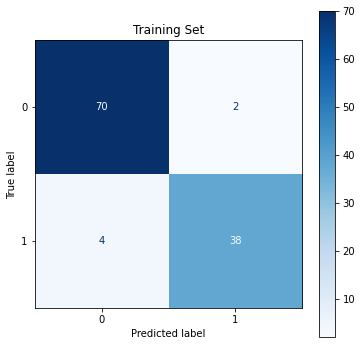

In [625]:
conf_mat_rf = ConfusionMatrixDisplay(confusion_matrix(Y_test, rf_predict))
fig, ax = plt.subplots(figsize=(6, 6))
ax.set_title('Training Set')
conf_mat_rf.plot(cmap=plt.cm.Blues, ax=ax);

## K-Nearest Neighbor Classifier



In [626]:
KNN = KNeighborsClassifier()
KNN.fit(X_train_pca,Y_train)

prediction1 = KNN.predict(X_test_pca)
print ("Accuracy =", metrics.accuracy_score(prediction1,Y_test))

Accuracy = 0.9473684210526315


In [627]:
print("For K-Nearest Neighbors:")
knnscores = cross_val_score(KNN, X, Y,cv=5,scoring='accuracy')
print(knnscores)
print(knnscores.mean())

For K-Nearest Neighbors:
[0.88596491 0.93859649 0.93859649 0.94736842 0.92920354]
0.9279459711224964


In [628]:
knn_predict =KNN.fit(X_train_pca, Y_train).predict(X_test_pca)


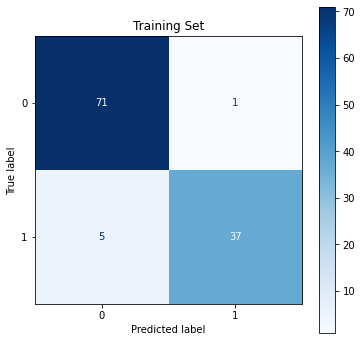

In [629]:
conf_mat_knn = ConfusionMatrixDisplay(confusion_matrix(Y_test, knn_predict))
fig, ax = plt.subplots(figsize=(6, 6))
ax.set_title('Training Set')
conf_mat_knn.plot(cmap=plt.cm.Blues, ax=ax);

## Support Vector Classifier (SVC)

In [630]:
supportvector = SVC(probability=True)
supportvector.fit(X_train_pca,Y_train)

prediction2 = supportvector.predict(X_test_pca)
print ("Accuracy =", metrics.accuracy_score(prediction2,Y_test))

Accuracy = 0.9298245614035088


In [631]:
print("For Support Vector:")
svscores = cross_val_score(supportvector, X, Y,cv=5,scoring='accuracy')
print(svscores)
print(svscores.mean())

For Support Vector:
[0.85087719 0.89473684 0.92982456 0.94736842 0.9380531 ]
0.9121720229777983


In [632]:
svc_predict = supportvector.fit(X_train_pca, Y_train).predict(X_test_pca)


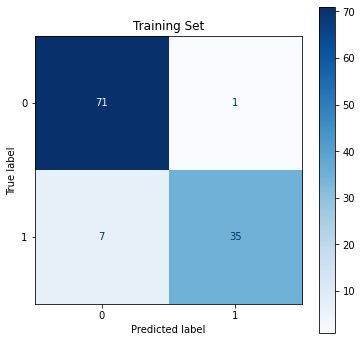

In [633]:
conf_mat_svc = ConfusionMatrixDisplay(confusion_matrix(Y_test, svc_predict))
fig, ax = plt.subplots(figsize=(6, 6))
ax.set_title('Training Set')
conf_mat_svc.plot(cmap=plt.cm.Blues, ax=ax);

## Logistic Regression

In [634]:
Logistic_reg = LogisticRegression(solver='lbfgs', max_iter=50)
Logistic_reg.fit(X_train_pca,Y_train)

prediction3 = Logistic_reg.predict(X_test_pca)
print ("Accuracy =", metrics.accuracy_score(prediction3,Y_test))

Accuracy = 0.9473684210526315


In [635]:
print("For Logistic Regression:")
lrscores = cross_val_score(Logistic_reg, X, Y,cv=5,scoring='accuracy')
print(lrscores)
print(lrscores.mean())

For Logistic Regression:
[0.9122807  0.92105263 0.96491228 0.92105263 0.9380531 ]
0.9314702685918336


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [636]:
lr_predict = Logistic_reg.fit(X_train_pca, Y_train).predict(X_test_pca)


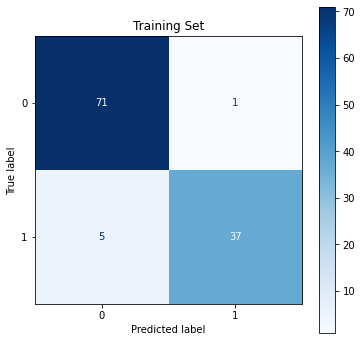

In [637]:
conf_mat_lr = ConfusionMatrixDisplay(confusion_matrix(Y_test, lr_predict))
fig, ax = plt.subplots(figsize=(6, 6))
ax.set_title('Training Set')
conf_mat_lr.plot(cmap=plt.cm.Blues, ax=ax);

## Naive Bayes Classifier

In [638]:
Naive_bayes = GaussianNB()
NB = Naive_bayes.fit(X_train_pca,Y_train)

In [639]:
prediction4 = NB.predict(X_test_pca)
print ("Accuracy =", metrics.accuracy_score(prediction4,Y_test))

Accuracy = 0.8859649122807017


In [640]:
print("For NAive Bayes Classifier:")
nbscores = cross_val_score(Naive_bayes, X, Y,cv=5,scoring='accuracy')
print(nbscores)
print(nbscores.mean())

For NAive Bayes Classifier:
[0.92105263 0.92105263 0.94736842 0.94736842 0.95575221]
0.9385188635305075


In [641]:
nb_predict = Naive_bayes.fit(X_train_pca, Y_train).predict(X_test_pca)


array([[68,  4],
       [ 9, 33]])

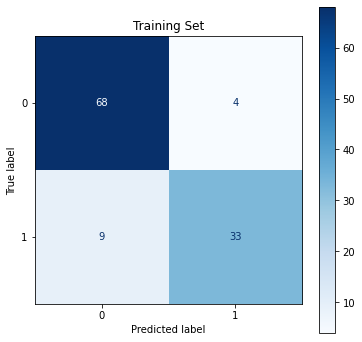

In [644]:
conf_mat_nb = ConfusionMatrixDisplay(confusion_matrix(Y_test, nb_predict))
fig, ax = plt.subplots(figsize=(6, 6))
ax.set_title('Training Set')
conf_mat_nb.plot(cmap=plt.cm.Blues, ax=ax);

## Ensemble Classifier

In [642]:
ensem_Clf = VotingClassifier(estimators = [('rf',randomforest), ('svc',supportvector), ('KNN',KNN), ('LR', Logistic_reg),('NB',Naive_bayes)], voting='soft') 
ensem_Clf.fit(X_train, Y_train)

ensem_Clf_pred = ensem_Clf.predict(X_test)
ensem_Clf_accu = accuracy_score(Y_test, ensem_Clf_pred)
print('Accuracy score of the Voting ensemble model is', ensem_Clf_accu)

Accuracy score of the Voting ensemble model is 0.9473684210526315


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [643]:
models = [
    ("Logistic Regression", LogisticRegression()),
    ("KNN", KNeighborsClassifier()),
    ("Naive Bayesian", GaussianNB()),
    ("Support Vector Machine", SVC()),
    ("Random Forest", RandomForestClassifier()),
    ("Ensemble Classifier",VotingClassifier(estimators = [('rf',randomforest), ('svc',supportvector), ('KNN',KNN), ('LR', Logistic_reg),('NB',Naive_bayes)], voting='soft'))]

names = []
cv_mean = []
cv_std = []
scoring = "accuracy"
for name, model in models:
    kfold = KFold(n_splits=10)
    cv_results = cross_val_score(model, X_train_pca, Y_train, cv=kfold, scoring=scoring)
    names.append(name)
    cv_mean.append(cv_results.mean())
    cv_std.append(cv_results.std())

model_results = pd.DataFrame(list(zip(names, cv_mean, cv_std)), columns=['model', 'accuracy', 'stdev'])
model_results.round(3)

,model,accuracy,stdev
0,Logistic Regression,0.947,0.030
1,KNN,0.936,0.023
2,Naive Bayesian,0.916,0.026
3,Support Vector Machine,0.932,0.044
4,Random Forest,0.932,0.040
5,Ensemble Classifier,0.940,0.040
